In [0]:
!pip install tensorflow==2.0.0
!pip install scikit-plot
print(tf.__version__)
import tensorflow as tf 
import pandas as pd 
import numpy as np
import librosa 
import scikitplot as pct
import csv
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout,Flatten,Input,Dense,LSTM,Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras import models 
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

     |████████████████████████████████| 86.3MB 51kB/s 
     |████████████████████████████████| 450kB 41.1MB/s 
     |████████████████████████████████| 3.8MB 51.6MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
os.listdir('/content/drive/My Drive/Project files')

['P1 stacksample.zip',
 'P2 genres.tar.gz',
 'P3 Quora Text Classification with embeddings.zip',
 'P4 state-farm-distracted-driver-detection(1).zip',
 'P5 Image Captioning.zip']

In [0]:
!mkdir Genres

In [0]:
!tar -xvf '/content/drive/My Drive/Project files/P2 genres.tar.gz' -C '/content/Genres'

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

In [0]:
os.listdir('/content/Genres/genres')

['rock',
 'pop',
 'hiphop',
 'metal',
 'country',
 'reggae',
 'blues',
 'jazz',
 'classical',
 'disco']

The dataset consists of 10 genres

    * Blues
    * Classical
    * Country
    * Disco
    * Hiphop
    * Jazz
    * Metal
    * Pop
    * Reggae
    * Rock

Each Dataset consist of 100 files.So total 1000 files are there in the dataset.

In [0]:
genres=['rock',
 'pop',
 'hiphop',
 'metal',
 'country',
 'reggae',
 'blues',
 'jazz',
 'classical',
 'disco']

We will extract

    Mel-frequency cepstral coefficients (MFCC)(20 in number)
    Spectral Centroid,
    Zero Crossing Rate
    Chroma Frequencies
    Spectral Roll-off.
    Root mean square error
from audio files

In [0]:

colnames = 'filename chrm_stft rmse spctrl_cntrd spctrl_bndwdth rllff zr_crssng_rt'
for i in range(1, 21):
    colnames += f' mfcc{i}'
colnames += ' label'
colnames = colnames.split()

In [0]:
colnames

['filename',
 'chrm_stft',
 'rmse',
 'spctrl_cntrd',
 'spctrl_bndwdth',
 'rllff',
 'zr_crssng_rt',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [0]:
file = open('dataset.csv',mode = 'w',newline= '')
with file:
  writer=csv.writer(file)
  writer.writerow(colnames)

In [0]:
genres

['rock',
 'pop',
 'hiphop',
 'metal',
 'country',
 'reggae',
 'blues',
 'jazz',
 'classical',
 'disco']

#FEATURE EXTRACTION FROM AUDIO FILES:

In [0]:
for genre in genres:
  for filename in os.listdir(f'/content/Genres/genres/{genre}'):
    sound = f'/content/Genres/genres/{genre}/{filename}'
    y,sr =librosa.load(sound,mono=True,duration=60)
    chrm_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spctrl_cntrd = librosa.feature.spectral_centroid(y=y, sr=sr)
    spctrl_bndwth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rllff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zr_crssng_rt = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    collect = f'{filename} {np.mean(chrm_stft)} {np.mean(rmse)} {np.mean(spctrl_cntrd)}   {np.mean(spctrl_bndwth)}  {np.mean(rllff)}  {np.mean(zr_crssng_rt)}'
    for e in mfcc:
      collect += f'  {np.mean(e)}'
    collect += f' {genre}'
    with open('dataset.csv','a',newline='') as file:
      writer=csv.writer(file)
      writer.writerow(collect.split())


#EXTRACTED FEATURES FROM AUDIO FILES

In [0]:
data=pd.read_csv('dataset.csv')
data

,filename,chrm_stft,rmse,spctrl_cntrd,spctrl_bndwdth,rllff,zr_crssng_rt,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,rock.00036.au,0.427913,0.216395,2850.226846,2621.669424,5897.606075,0.147047,-0.404373,72.343059,-13.062170,23.926010,10.236517,10.320725,-5.020276,14.341698,-0.697162,9.891173,0.727404,5.227028,-4.096425,0.296857,-0.312532,-1.239064,-6.156088,1.021903,-3.381267,1.331611,rock
1,rock.00014.au,0.380643,0.053660,1937.046639,2008.418220,3986.148956,0.083579,-256.348864,103.121397,-8.430391,48.598797,-4.187838,17.345721,-6.686840,17.043679,-4.618223,5.320812,-10.026877,8.226201,-6.207551,3.433033,-3.659521,1.702693,-5.417051,-3.247441,-3.877491,-1.032240,rock
2,rock.00058.au,0.301064,0.087493,2438.007049,2790.267286,5499.143752,0.098955,-141.975978,96.978733,23.259325,10.460343,6.295158,4.960870,1.064564,1.097263,-4.850176,0.870890,-3.457687,-2.009840,-5.899571,-6.029272,-2.109433,-6.166145,-0.306299,5.088569,0.128272,1.678422,rock
3,rock.00053.au,0.409181,0.190228,3361.723252,2933.069563,6920.301851,0.187548,4.113660,52.607854,-11.054242,19.703703,11.282638,7.059861,5.063942,4.562585,0.028087,5.157491,3.407085,1.172333,0.582339,1.273216,0.717001,-0.807161,-3.010583,-1.713658,-1.694629,-1.296358,rock
4,rock.00031.au,0.369134,0.126217,2639.202418,2512.677673,5302.980102,0.132445,-89.064879,81.370180,-12.575956,22.780821,-7.058202,-0.490948,2.752371,-3.443338,-7.706244,-0.840143,-4.882663,-2.685866,-5.295065,-4.599853,-2.973551,-2.211746,-3.562544,-1.001371,-0.492525,-0.966438,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,disco.00086.au,0.395068,0.165367,1867.699334,1874.680403,3803.774550,0.094466,-95.772940,122.081232,-29.350684,50.346947,-11.964957,28.414886,-7.060166,11.874757,-8.622875,11.584835,-18.412131,6.880554,-11.665754,2.691343,-5.790362,0.659386,-7.262437,1.747296,-6.146463,-3.739097,disco
996,disco.00032.au,0.368345,0.111073,2446.919077,2449.159840,4958.057490,0.123251,-123.297840,86.987998,-22.510141,6.945116,8.464021,12.645013,-0.851946,-0.829922,-3.255981,2.626363,-0.774425,-0.420110,-3.837739,-5.651452,-1.840305,0.122950,-1.054999,4.496278,-0.978958,-5.256925,disco
997,disco.00030.au,0.450151,0.170026,3167.833752,3047.736411,6935.373428,0.150775,-40.713696,63.950915,4.902645,16.339071,12.110873,9.339044,4.542073,5.188459,-0.590086,-0.083634,2.950236,-1.482731,-1.766810,-2.277743,-6.122128,-4.721450,-4.741263,-5.762606,-4.028023,-5.362844,disco
998,disco.00001.au,0.410686,0.177221,3292.625967,2768.043874,6522.402265,0.188552,-28.996528,51.860023,-7.567776,21.508853,8.142489,18.112508,6.885487,6.562539,0.709288,11.163655,-1.810252,1.638895,-2.588552,-1.373493,-3.614005,0.215830,-0.391182,2.636313,-3.362998,-0.089296,disco


In [0]:
data.shape

(1000, 28)

In [0]:
data=data.drop(['filename'],axis=1)

In [0]:
labels=data.loc[:,'label']
labels

0       rock
1       rock
2       rock
3       rock
4       rock
       ...  
995    disco
996    disco
997    disco
998    disco
999    disco
Name: label, Length: 1000, dtype: object

In [0]:
X = data.iloc[:,:-1]
X

,chrm_stft,rmse,spctrl_cntrd,spctrl_bndwdth,rllff,zr_crssng_rt,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.427913,0.216395,2850.226846,2621.669424,5897.606075,0.147047,-0.404373,72.343059,-13.062170,23.926010,10.236517,10.320725,-5.020276,14.341698,-0.697162,9.891173,0.727404,5.227028,-4.096425,0.296857,-0.312532,-1.239064,-6.156088,1.021903,-3.381267,1.331611
1,0.380643,0.053660,1937.046639,2008.418220,3986.148956,0.083579,-256.348864,103.121397,-8.430391,48.598797,-4.187838,17.345721,-6.686840,17.043679,-4.618223,5.320812,-10.026877,8.226201,-6.207551,3.433033,-3.659521,1.702693,-5.417051,-3.247441,-3.877491,-1.032240
2,0.301064,0.087493,2438.007049,2790.267286,5499.143752,0.098955,-141.975978,96.978733,23.259325,10.460343,6.295158,4.960870,1.064564,1.097263,-4.850176,0.870890,-3.457687,-2.009840,-5.899571,-6.029272,-2.109433,-6.166145,-0.306299,5.088569,0.128272,1.678422
3,0.409181,0.190228,3361.723252,2933.069563,6920.301851,0.187548,4.113660,52.607854,-11.054242,19.703703,11.282638,7.059861,5.063942,4.562585,0.028087,5.157491,3.407085,1.172333,0.582339,1.273216,0.717001,-0.807161,-3.010583,-1.713658,-1.694629,-1.296358
4,0.369134,0.126217,2639.202418,2512.677673,5302.980102,0.132445,-89.064879,81.370180,-12.575956,22.780821,-7.058202,-0.490948,2.752371,-3.443338,-7.706244,-0.840143,-4.882663,-2.685866,-5.295065,-4.599853,-2.973551,-2.211746,-3.562544,-1.001371,-0.492525,-0.966438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.395068,0.165367,1867.699334,1874.680403,3803.774550,0.094466,-95.772940,122.081232,-29.350684,50.346947,-11.964957,28.414886,-7.060166,11.874757,-8.622875,11.584835,-18.412131,6.880554,-11.665754,2.691343,-5.790362,0.659386,-7.262437,1.747296,-6.146463,-3.739097
996,0.368345,0.111073,2446.919077,2449.159840,4958.057490,0.123251,-123.297840,86.987998,-22.510141,6.945116,8.464021,12.645013,-0.851946,-0.829922,-3.255981,2.626363,-0.774425,-0.420110,-3.837739,-5.651452,-1.840305,0.122950,-1.054999,4.496278,-0.978958,-5.256925
997,0.450151,0.170026,3167.833752,3047.736411,6935.373428,0.150775,-40.713696,63.950915,4.902645,16.339071,12.110873,9.339044,4.542073,5.188459,-0.590086,-0.083634,2.950236,-1.482731,-1.766810,-2.277743,-6.122128,-4.721450,-4.741263,-5.762606,-4.028023,-5.362844
998,0.410686,0.177221,3292.625967,2768.043874,6522.402265,0.188552,-28.996528,51.860023,-7.567776,21.508853,8.142489,18.112508,6.885487,6.562539,0.709288,11.163655,-1.810252,1.638895,-2.588552,-1.373493,-3.614005,0.215830,-0.391182,2.636313,-3.362998,-0.089296


In [0]:
y = labels
y

0       rock
1       rock
2       rock
3       rock
4       rock
       ...  
995    disco
996    disco
997    disco
998    disco
999    disco
Name: label, Length: 1000, dtype: object

#SPLITING DATA INTO TRAIN & TEST

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size =0.2,random_state =2 ,stratify = y)

In [0]:
X_train

,chrm_stft,rmse,spctrl_cntrd,spctrl_bndwdth,rllff,zr_crssng_rt,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
123,0.496824,0.215618,2327.245000,2516.662861,4929.579704,0.095445,-30.252964,88.465514,-6.566091,32.796691,8.507998,8.389243,2.051466,6.864453,3.581801,2.722987,1.291287,3.290282,1.565279,2.372661,2.528300,1.102296,-1.573124,-0.257949,0.121787,0.426622
561,0.401963,0.101107,2009.585992,2141.377602,4304.667164,0.084453,-175.551206,104.886211,-15.680852,27.523688,-8.108692,24.019667,-10.319920,18.858123,-8.376988,11.853948,-7.580990,12.563685,-6.032729,2.497779,1.900042,7.134635,-3.370106,12.441626,-3.351833,0.741723
567,0.487689,0.072866,1640.702891,1907.194610,3497.280296,0.067808,-256.209643,104.230457,-7.273622,56.284035,11.040131,27.327317,5.829512,17.790504,-1.271257,14.677932,-3.476554,10.853967,-2.466573,1.552297,-3.725412,-1.371031,-4.196731,1.403947,-0.262044,-1.598751
541,0.416666,0.267853,3094.390952,3136.002321,6974.842640,0.100864,-70.058141,54.370973,15.569383,19.790177,27.015215,13.236808,0.684860,10.065897,6.683065,-0.305762,2.968273,6.012584,1.090487,3.169207,0.245538,3.041889,-5.601930,-1.308973,-1.961411,-8.719458
488,0.360101,0.113700,1729.627760,2247.426190,3358.804980,0.066504,-162.764526,119.903032,-2.913233,20.499269,27.806384,5.481036,6.042959,1.203107,-3.689240,0.367221,4.430039,-0.415175,2.456138,2.141740,-1.602083,3.633930,-3.467204,-2.559406,5.665482,-3.635042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.302456,0.103494,1831.993940,1729.653287,3481.517592,0.094042,-177.774235,118.205485,-17.565879,30.762400,-21.747839,11.920993,-20.730994,3.186578,-8.586039,-0.932852,-11.772434,-2.405833,-9.343665,-9.936210,-3.903995,-5.576591,-1.838263,-2.783800,-3.047909,-8.109991
231,0.489699,0.185224,2436.413865,2117.155579,4774.675537,0.133829,-51.272866,91.118346,-33.767143,69.934795,-12.928218,23.178011,-13.754597,23.776511,-14.728825,10.697195,-13.464252,6.077833,-14.718272,1.675102,-7.239169,3.965551,-2.643747,7.553513,-0.134423,-0.732085
808,0.219280,0.008015,1054.545714,1455.644187,1947.064535,0.047657,-482.586229,154.875682,-5.046085,29.736521,-1.872348,8.219618,-4.781974,9.648200,-3.344435,4.544591,-10.096141,-0.656025,-2.455115,-0.165064,1.863819,3.482606,3.388221,1.115724,1.276875,-0.661828
813,0.274358,0.021470,876.983429,1108.524563,1457.413152,0.051045,-392.922926,190.782923,-13.342515,8.278395,1.549723,-11.070782,-11.240392,-14.006675,-10.618851,-9.384769,-4.619543,-10.070488,-4.819359,-1.746467,-4.662369,-2.109612,1.025919,1.305982,-0.153218,-1.409482


#SCALING DATA

In [0]:
le=MinMaxScaler()
X_train=le.fit_transform(X_train)
X_test=le.transform(X_test)

In [0]:
Y_train

123          pop
561       reggae
567       reggae
541       reggae
488      country
         ...    
605        blues
231       hiphop
808    classical
813    classical
644        blues
Name: label, Length: 800, dtype: object

In [0]:
la = LabelEncoder()
y_train=to_categorical(la.fit_transform(Y_train))
y_test=to_categorical(la.transform(Y_test))

In [0]:
la.classes_

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

#MODEL BUILDING 

In [0]:
model = models.Sequential()
model.add(Dense(256, activation='relu', input_dim = X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 256)               6912      
_________________________________________________________________
dropout_46 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_47 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 10)                1290      
Total params: 41,098
Trainable params: 41,098
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=Adam(lr=0.0025),loss= 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,batch_size=200,epochs=200,validation_data=[X_test,y_test])

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 525us/sample - loss: 2.3399 - accuracy: 0.1175 - val_loss: 2.2431 - val_accuracy: 0.2150
Epoch 2/200
800/800 [==============================] - 0s 34us/sample - loss: 2.2438 - accuracy: 0.1737 - val_loss: 2.1878 - val_accuracy: 0.2700
Epoch 3/200
800/800 [==============================] - 0s 32us/sample - loss: 2.2024 - accuracy: 0.2037 - val_loss: 2.1117 - val_accuracy: 0.3200
Epoch 4/200
800/800 [==============================] - 0s 32us/sample - loss: 2.1203 - accuracy: 0.2463 - val_loss: 2.0286 - val_accuracy: 0.3100
Epoch 5/200
800/800 [==============================] - 0s 32us/sample - loss: 2.0179 - accuracy: 0.3150 - val_loss: 1.9420 - val_accuracy: 0.3150
Epoch 6/200
800/800 [==============================] - 0s 31us/sample - loss: 1.9572 - accuracy: 0.3250 - val_loss: 1.8595 - val_accuracy: 0.3200
Epoch 7/200
800/800 [==============================] - 0s 30us/sample - loss:

In [0]:
history.history

{'accuracy': [0.1175,
  0.17375,
  0.20375,
  0.24625,
  0.315,
  0.325,
  0.32375,
  0.33125,
  0.3375,
  0.33875,
  0.3575,
  0.36125,
  0.38875,
  0.39625,
  0.395,
  0.40875,
  0.41875,
  0.41375,
  0.42125,
  0.42875,
  0.4075,
  0.45,
  0.4475,
  0.43125,
  0.44875,
  0.44875,
  0.4525,
  0.48625,
  0.46625,
  0.47125,
  0.51,
  0.4825,
  0.4925,
  0.4775,
  0.5075,
  0.5225,
  0.505,
  0.5075,
  0.52375,
  0.5175,
  0.5275,
  0.55375,
  0.53,
  0.5625,
  0.525,
  0.5525,
  0.54875,
  0.5525,
  0.55625,
  0.56,
  0.54625,
  0.55625,
  0.535,
  0.56875,
  0.5575,
  0.5625,
  0.5625,
  0.5675,
  0.5625,
  0.58375,
  0.58125,
  0.5725,
  0.58375,
  0.57,
  0.595,
  0.55625,
  0.605,
  0.58375,
  0.59,
  0.61875,
  0.6125,
  0.59875,
  0.57625,
  0.61,
  0.62,
  0.60625,
  0.60375,
  0.61125,
  0.60375,
  0.61125,
  0.62625,
  0.625,
  0.6075,
  0.61625,
  0.60625,
  0.6125,
  0.65,
  0.64125,
  0.62125,
  0.63,
  0.6175,
  0.6275,
  0.6475,
  0.6075,
  0.62625,
  0.63125,
  0.63375,

###PLOTTING LEARNING CURVE

In [0]:
def plot_curve(range_epoch,hsty):
  epoch_range=range(1,range_epoch+1)
  plt.plot(epoch_range,hsty.history['accuracy'])
  plt.plot(epoch_range,hsty.history['val_accuracy'])
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.title('Model Accuracy')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  
  epoch_range=range(1,range_epoch+1)
  plt.plot(epoch_range,hsty.history['loss'])
  plt.plot(epoch_range,hsty.history['val_loss'])
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.title('Model loss')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

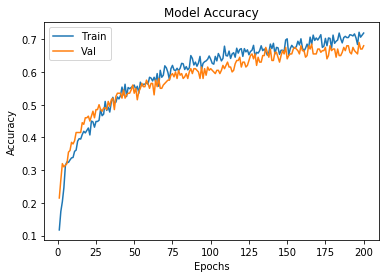

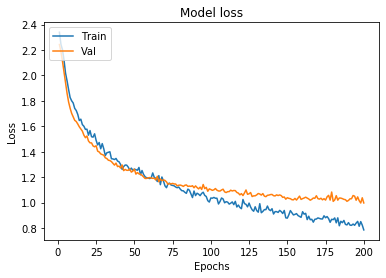

In [0]:
plot_curve(200,history)

In [0]:
ypred=model.predict_classes(X_test)
ypred

array([4, 6, 1, 1, 8, 0, 0, 0, 1, 3, 1, 8, 5, 3, 2, 1, 2, 1, 7, 4, 4, 1,
       3, 3, 6, 1, 3, 9, 5, 5, 2, 6, 7, 5, 2, 0, 6, 6, 7, 3, 6, 9, 4, 5,
       9, 5, 6, 3, 8, 2, 3, 6, 9, 3, 4, 6, 2, 1, 0, 7, 5, 2, 8, 5, 5, 6,
       1, 9, 9, 2, 0, 5, 3, 7, 4, 1, 5, 8, 4, 5, 3, 5, 2, 8, 3, 6, 3, 3,
       5, 5, 6, 0, 4, 8, 8, 6, 7, 8, 0, 0, 6, 2, 5, 3, 1, 4, 0, 4, 1, 2,
       9, 4, 6, 7, 3, 0, 4, 2, 0, 0, 2, 9, 8, 7, 3, 0, 5, 6, 6, 8, 8, 3,
       6, 1, 0, 6, 2, 2, 5, 2, 6, 7, 0, 3, 3, 1, 2, 6, 7, 9, 5, 0, 5, 8,
       1, 8, 7, 8, 7, 3, 2, 0, 7, 0, 6, 8, 7, 2, 5, 0, 1, 9, 3, 3, 8, 3,
       5, 9, 5, 8, 3, 7, 1, 1, 1, 7, 4, 8, 7, 3, 5, 7, 8, 2, 6, 3, 4, 6,
       7, 2])

In [0]:
New_O=la.inverse_transform(ypred)
New_O

array(['hiphop', 'metal', 'classical', 'classical', 'reggae', 'blues',
       'blues', 'blues', 'classical', 'disco', 'classical', 'reggae',
       'jazz', 'disco', 'country', 'classical', 'country', 'classical',
       'pop', 'hiphop', 'hiphop', 'classical', 'disco', 'disco', 'metal',
       'classical', 'disco', 'rock', 'jazz', 'jazz', 'country', 'metal',
       'pop', 'jazz', 'country', 'blues', 'metal', 'metal', 'pop',
       'disco', 'metal', 'rock', 'hiphop', 'jazz', 'rock', 'jazz',
       'metal', 'disco', 'reggae', 'country', 'disco', 'metal', 'rock',
       'disco', 'hiphop', 'metal', 'country', 'classical', 'blues', 'pop',
       'jazz', 'country', 'reggae', 'jazz', 'jazz', 'metal', 'classical',
       'rock', 'rock', 'country', 'blues', 'jazz', 'disco', 'pop',
       'hiphop', 'classical', 'jazz', 'reggae', 'hiphop', 'jazz', 'disco',
       'jazz', 'country', 'reggae', 'disco', 'metal', 'disco', 'disco',
       'jazz', 'jazz', 'metal', 'blues', 'hiphop', 'reggae', 'reggae',


In [0]:
Old_test=np.array(Y_test)

array(['hiphop', 'metal', 'classical', 'classical', 'reggae', 'blues',
       'blues', 'blues', 'classical', 'disco', 'classical', 'reggae',
       'jazz', 'disco', 'country', 'classical', 'rock', 'classical',
       'hiphop', 'hiphop', 'disco', 'classical', 'disco', 'disco', 'rock',
       'classical', 'jazz', 'disco', 'jazz', 'rock', 'country', 'blues',
       'pop', 'jazz', 'country', 'rock', 'metal', 'blues', 'pop', 'metal',
       'metal', 'rock', 'reggae', 'blues', 'rock', 'jazz', 'hiphop',
       'rock', 'hiphop', 'jazz', 'disco', 'metal', 'country', 'disco',
       'hiphop', 'metal', 'rock', 'classical', 'rock', 'pop', 'jazz',
       'reggae', 'reggae', 'pop', 'jazz', 'metal', 'jazz', 'rock', 'rock',
       'country', 'metal', 'jazz', 'disco', 'pop', 'hiphop', 'classical',
       'jazz', 'reggae', 'hiphop', 'country', 'hiphop', 'jazz', 'disco',
       'reggae', 'country', 'metal', 'pop', 'metal', 'jazz', 'pop',
       'metal', 'blues', 'hiphop', 'reggae', 'reggae', 'metal', 'po

In [0]:
model.evaluate(X_test,y_test)

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9966378235816955, 0.68]

###CONFUSION MATRIX

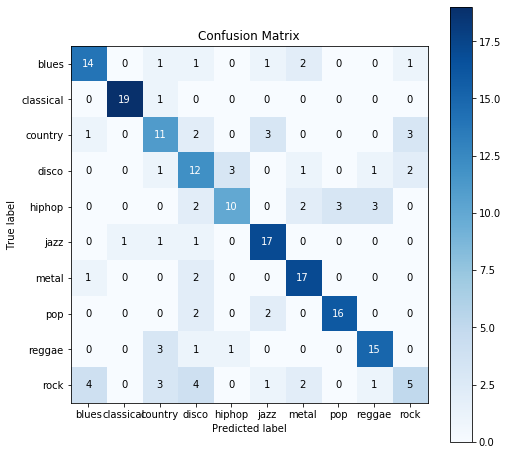

In [0]:
pct.metrics.plot_confusion_matrix(Old_test,New_O,labels=la.classes_,figsize=(8,8))